# Housing price prediction using Polynomial Regression
## Here we are going to predict housing prices using Polynomial Regression and Sci-kit learn library. 

For more information on Polynomial Regression, please refer to https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

Data was taken from https://www.kaggle.com/quantbruce/real-estate-price-prediction?ref=hackernoon.com




## Our first step will be to import various libraries.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data
### We have 5 main categories namely :
     - House age
     - Distance to the nearest MRT station
     - Number of convenience stores
     - Lattitude
     - Longitude
     - House price of unit area

In [2]:
dataset = pd.read_csv("Real estate.csv")
dataset

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,8.1,104.81010,5,24.96674,121.54067,52.5


## Visualizing data

### First we are going to plot the relationship between 'house age' and 'house price'

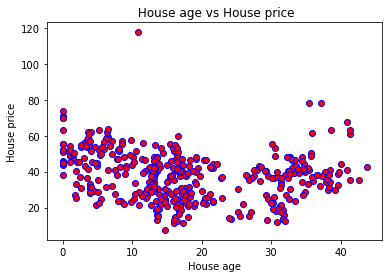

In [3]:
house_age = dataset.iloc[:,1]
house_price = dataset.iloc[:,6]
plt.scatter(house_age, house_price, s=None, c='red', marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors='blue')
plt.title(' House age vs House price')
plt.xlabel('House age')
plt.ylabel('House price')
plt.show()

### Now we are going to plot the relationship between 'Number of convenience stores' and 'house price'

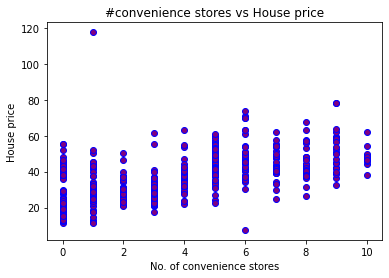

In [4]:
convin_stores = dataset.iloc[:,3]
house_price = dataset.iloc[:,6]
plt.scatter(convin_stores, house_price, s=None, c='purple', marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors='blue')
plt.title("#convenience stores vs House price")
plt.xlabel('No. of convenience stores')
plt.ylabel('House price')
plt.show()

## Preprocessing data

In [5]:
X = dataset.iloc[:,1:6].values
y = dataset.iloc[:,6:7].values

In [6]:
X.shape

(414, 5)

In [7]:
y.shape

(414, 1)

### Splitting data into train and test set 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Importing Linear Regression and Polynomial features

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Applying Polynomial features

In [10]:
poly_reg=PolynomialFeatures(degree=2)
X_poly_train=poly_reg.fit_transform(X_train)
X_poly_test=poly_reg.fit_transform(X_test)

## Training the model

In [11]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly_train,y_train)

LinearRegression()

## Evaluating the model

In [12]:
score_poly_train = lin_reg2.score(X_poly_train, y_train)
print(score_poly_train)

0.6898298981031804


### We have accuracy of 68% on training set.

In [13]:
score_poly_test = lin_reg2.score(X_poly_test, y_test)
print(score_poly_test)

0.6432571055232355


### We have accuracy of 64% on test set.

In [14]:
predictions = lin_reg2.predict(X_poly_test)

### Graph depicting our predictions vs actual values taking 'House age' as x-axis and 'House price' as y-axis.

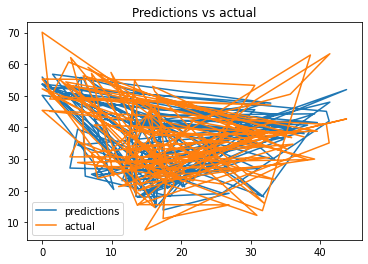

In [15]:
plt.plot(X_test[:,0], predictions, label='predictions')
plt.plot(X_test[:,0], y_test, label='actual')
plt.title('Predictions vs actual')
plt.legend()

### Graph depicting our predictions vs actual values taking 'No. of convenience stores' as x-axis and 'House price' as y-axis

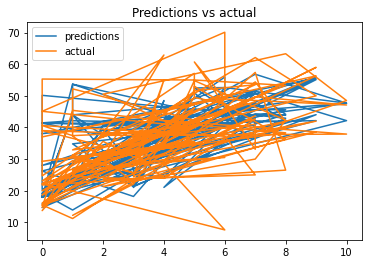

In [16]:
plt.plot(X_test[:,2], predictions, label='predictions')
plt.plot(X_test[:,2], y_test, label='actual')
plt.title('Predictions vs actual')
plt.legend()

### Graph depicting our predictions vs actual values taking 'Input features' as x-axis and 'House price' as y-axis

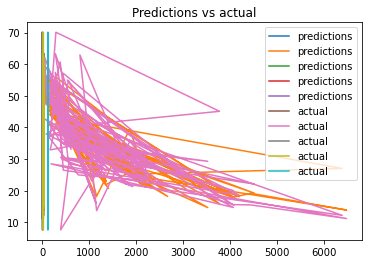

In [17]:
plt.plot(X_test, predictions, label='predictions')
plt.plot(X_test, y_test, label='actual')
plt.title('Predictions vs actual')
plt.legend()

# Thank you